## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [53]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [54]:
# your code here
#model1 = nn.Sequential(OrderedDict([
#    ('hidden', nn.
#]))

model = nn.Sequential(OrderedDict([
    ('inputLayer', nn.Linear(2,10)),
    ('activation1', nn.ReLU()),
    ('hiddenLayer', nn.Linear(10,5)),
    ('activation2', nn.ReLU()),
    ('outputLayer', nn.Linear(5,2)),
]))

In [55]:
print(model)

Sequential(
  (inputLayer): Linear(in_features=2, out_features=10, bias=True)
  (activation1): ReLU()
  (hiddenLayer): Linear(in_features=10, out_features=5, bias=True)
  (activation2): ReLU()
  (outputLayer): Linear(in_features=5, out_features=2, bias=True)
)


In [56]:
# your code here
#data_in = torch.tensor( ...
#input data = [0,0], [0,1], [1,0], [1,1], the two bits

data_in = torch.tensor([[0.,0.], [0.,1.], [1.,0.], [1.,1.]])
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [57]:
# your code here
# data_target = torch.tensor( ...
#output data = [0,0], [0,1], [0,1], [1,0], the carry flag and the result
data_target = torch.tensor([[0.,0.], [0.,1.], [0.,1.], [1.,0.]])
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])


In [58]:
# your code here
# criterion = nn.CrossEntropyLoss(); used for classification (loss function)
# optimizer = torch.optim.SGD(): Stochastic gradient descent it's what i know
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [59]:
# your code here
# Train the model
number_of_epochs = 500
for i in range(number_of_epochs):
    prediction = model(data_in)
    loss = criterion(prediction, data_target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f'[{i}/{number_of_epochs}], Loss: {loss.item():.4f}')

[0/500], Loss: 0.5843
[100/500], Loss: 0.0875
[200/500], Loss: 0.0204
[300/500], Loss: 0.0022
[400/500], Loss: 0.0001


[[-6.6362554e-03  2.0950064e-03]
 [ 3.6141239e-03  9.9844468e-01]
 [ 6.8125501e-04  9.9966323e-01]
 [ 9.9934024e-01  5.3899735e-04]]
accuracy=1.0


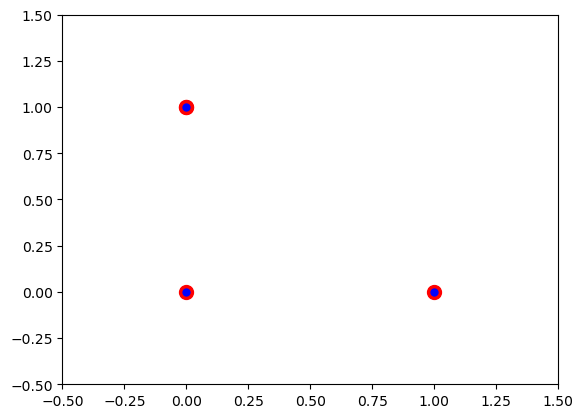

In [60]:
# your code here
# visualize the results
import matplotlib.pyplot as plt

prediction = model(data_in)
prediction_array = prediction.detach().numpy()
print(prediction_array)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

#first point which should be (0,0)
p1x= round(prediction_array[0][0])
p1y=round(prediction_array[0][1])
plt.plot(0, 0, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p1x, p1y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")


#second point which should be (0,1)
p2x= round(prediction_array[1][0])
p2y= round(prediction_array[1][1])
plt.plot(0, 1, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p2x, p2y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")


#third point which should be (0,1)
p3x= round(prediction_array[2][0])
p3y= round(prediction_array[2][1])
plt.plot(0, 1, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p3x, p3y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")

#fourth point which should be (1,0)
p4x= round(prediction_array[3][0])
p4y= round(prediction_array[3][1])
plt.plot(1, 0, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p4x, p4y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")

accuracy = ((p1x==0 and p1y==0) + (p2x==0 and p2y==1)+ (p3x==0 and p3y==1) + (p4x==1 and p4y==0))/4
print("accuracy="+str(accuracy))

In [62]:
# your code here
# print model weights

for name,parameter in model.named_parameters():
    if ("weight" in name):
        print(name + "---" + str(parameter.data))


inputLayer.weight---tensor([[-0.0234, -0.5851],
        [-0.6591, -0.3676],
        [ 0.8274, -0.7380],
        [-0.1675,  0.8349],
        [-0.1457, -0.4302],
        [ 0.1983,  0.7342],
        [ 0.8320,  0.7051],
        [ 0.1887, -0.6946],
        [ 0.4543, -0.2886],
        [ 1.0995, -0.0776]])
hiddenLayer.weight---tensor([[ 0.1648, -0.0027,  0.0876,  0.4414, -0.0423,  0.3136,  0.4435, -0.4732,
         -0.0971, -0.2105],
        [-0.2520, -0.1865,  0.3417, -0.3774,  0.0036, -0.2114,  0.2374,  0.1605,
          0.2810,  0.1162],
        [-0.0997,  0.1596, -0.4641,  0.0627,  0.1659,  0.0393,  0.3965, -0.1327,
          0.0349,  0.8402],
        [-0.0818, -0.0411,  0.1965,  0.1283, -0.2051, -0.3516, -0.0654,  0.0091,
         -0.2009,  0.1761],
        [ 0.0844, -0.0574,  0.4711, -0.4757,  0.2229, -0.2455, -0.0158,  0.1628,
          0.3629,  0.5803]])
outputLayer.weight---tensor([[ 0.0081,  0.1977,  0.8072, -0.4195, -0.4640],
        [ 0.7898,  0.6353, -0.8189, -0.3113,  0.7442]])


tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])
[0/500], Loss: 0.6029
[100/500], Loss: 0.3977
[200/500], Loss: 0.3710
[300/500], Loss: 0.3601
[400/500], Loss: 0.3333
[[ 0.00181226 -0.00351372]
 [ 0.0023751   0.11021772]
 [-0.00305128  1.0054468 ]
 [ 0.03130715  0.15038607]]
accuracy=0.5
inputLayer.weight---tensor([[-0.6819, -0.5834],
        [-0.6604, -0.5953],
        [ 0.5637, -0.3141],
        [ 0.2010, -0.4387],
        [ 0.1659, -0.7903]])
hiddenLayer1.weight---tensor([[-0.0097, -0.3097,  0.4468,  0.0584,  0.0305],
        [-0.0246,  0.0546,  0.4317,  0.3434, -0.3190],
        [ 0.3465, -0.2114, -0.0787, -0.5237,  0.0306],
        [-0.2518, -0.6777,  0.6344,  0.5983,  0.6582],
        [ 0.3167,  0.4302, -0.4235, -0.3596, -0.0954],
        [ 0.0256,  0.5241, -0.2871, -0.1261,  0.3208],
        [ 0.1341, -0.5594,  0.2148,  0.5975,  0.4266],
        [ 0.1573, -0.4281,  0.5289,  0.1306,  

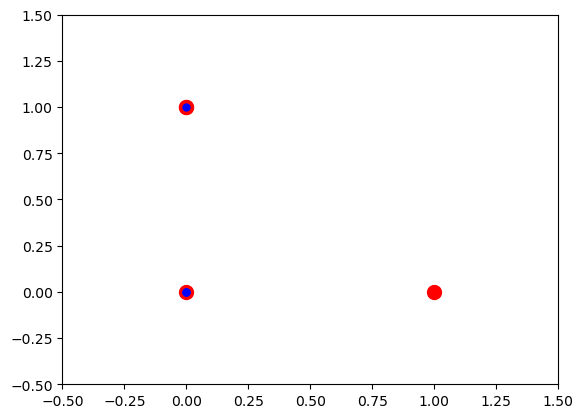

In [64]:
#new one
import torch
import torch.nn as nn
from collections import OrderedDict


model = nn.Sequential(OrderedDict([
    ('inputLayer', nn.Linear(2,5)),
    ('activation1', nn.ReLU()),
    ('hiddenLayer1', nn.Linear(5,10)),
    ('activation2', nn.ReLU()),
    ('hiddenLayer2', nn.Linear(10,5)),
    ('activation3', nn.ReLU()),
    ('outputLayer', nn.Linear(5,2)),
]))

#data_in = torch.tensor( ...
#input data = [0,0], [0,1], [1,0], [1,1], the two bits

data_in = torch.tensor([[0.,0.], [0.,1.], [1.,0.], [1.,1.]])
print(data_in)

#output data = [0,0], [0,1], [0,1], [1,0], the carry flag and the result
data_target = torch.tensor([[0.,0.], [0.,1.], [0.,1.], [1.,0.]])
print(data_target)

# criterion 
# optimizer 
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
number_of_epochs = 500
for i in range(number_of_epochs):
    prediction = model(data_in)
    loss = criterion(prediction, data_target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f'[{i}/{number_of_epochs}], Loss: {loss.item():.4f}')
        
# your code here
# visualize the results
import matplotlib.pyplot as plt

prediction = model(data_in)
prediction_array = prediction.detach().numpy()
print(prediction_array)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

#first point which should be (0,0)
p1x= round(prediction_array[0][0])
p1y=round(prediction_array[0][1])
plt.plot(0, 0, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p1x, p1y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")


#second point which should be (0,1)
p2x= round(prediction_array[1][0])
p2y= round(prediction_array[1][1])
plt.plot(0, 1, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p2x, p2y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")


#third point which should be (0,1)
p3x= round(prediction_array[2][0])
p3y= round(prediction_array[2][1])
plt.plot(0, 1, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p3x, p3y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")

#fourth point which should be (1,0)
p4x= round(prediction_array[3][0])
p4y= round(prediction_array[3][1])
plt.plot(1, 0, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p4x, p4y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")

accuracy = ((p1x==0 and p1y==0) + (p2x==0 and p2y==1)+ (p3x==0 and p3y==1) + (p4x==1 and p4y==0))/4
print("accuracy="+str(accuracy))

for name,parameter in model.named_parameters():
    if ("weight" in name):
        print(name + "---" + str(parameter.data))

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])
[0/500], Loss: 0.5252
[100/500], Loss: 0.1456
[200/500], Loss: 0.0465
[300/500], Loss: 0.0009
[400/500], Loss: 0.0000
[[-4.0230155e-04 -1.8519163e-04]
 [ 4.5055151e-04  1.0001452e+00]
 [ 8.6981058e-04  1.0003452e+00]
 [ 9.9927366e-01 -2.9575825e-04]]
accuracy=1.0
inputLayer.weight---tensor([[-0.7943, -0.7942],
        [-0.6954,  0.4477],
        [ 0.2704, -0.6329],
        [ 0.3722,  1.0048],
        [-0.2976,  0.3924]])
hiddenLayer.weight---tensor([[ 0.7191, -0.4721, -0.0355,  0.3216,  0.0193],
        [-0.7447,  0.2436,  0.1948, -0.2911,  0.1619],
        [ 0.0681,  0.4058, -0.0633, -0.5172, -0.2686],
        [-0.0708,  0.4062,  0.3961, -0.5541, -0.0969],
        [-0.0461,  0.1355, -0.1998,  0.0265,  0.2251],
        [ 0.4553, -0.1163, -0.4067,  0.0245, -0.2374],
        [ 0.6728, -0.3805, -0.0020,  0.2334,  0.0022],
        [-0.1193, -0.26

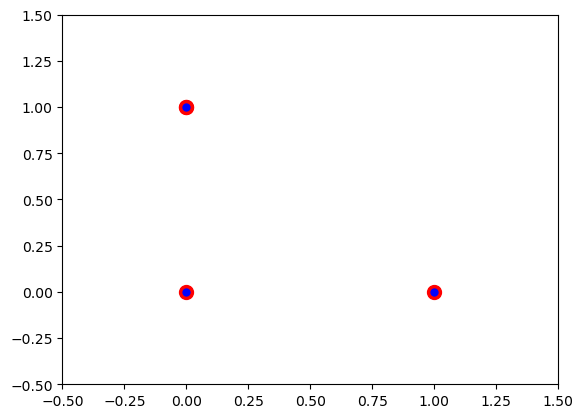

In [65]:
#another new one
import torch
import torch.nn as nn
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
    ('inputLayer', nn.Linear(2,5)),
    ('activate1', nn.LeakyReLU()),
    ('hiddenLayer', nn.Linear(5,10)),
    ('activate1', nn.LeakyReLU()),
    ('outputLayer', nn.Linear(10,2))
]))

#data_in = torch.tensor( ...
#input data = [0,0], [0,1], [1,0], [1,1], the two bits

data_in = torch.tensor([[0.,0.], [0.,1.], [1.,0.], [1.,1.]])
print(data_in)

#output data = [0,0], [0,1], [0,1], [1,0], the carry flag and the result
data_target = torch.tensor([[0.,0.], [0.,1.], [0.,1.], [1.,0.]])
print(data_target)

# criterion 
# optimizer = torch.optim.SGD(): Stochastic gradient descent it's what i know
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Train the model
number_of_epochs = 500
for i in range(number_of_epochs):
    prediction = model(data_in)
    loss = criterion(prediction, data_target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f'[{i}/{number_of_epochs}], Loss: {loss.item():.4f}')
        
# your code here
# visualize the results
import matplotlib.pyplot as plt

prediction = model(data_in)
prediction_array = prediction.detach().numpy()
print(prediction_array)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

#first point which should be (0,0)
p1x= round(prediction_array[0][0])
p1y=round(prediction_array[0][1])
plt.plot(0, 0, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p1x, p1y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")


#second point which should be (0,1)
p2x= round(prediction_array[1][0])
p2y= round(prediction_array[1][1])
plt.plot(0, 1, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p2x, p2y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")


#third point which should be (0,1)
p3x= round(prediction_array[2][0])
p3y= round(prediction_array[2][1])
plt.plot(0, 1, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p3x, p3y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")

#fourth point which should be (1,0)
p4x= round(prediction_array[3][0])
p4y= round(prediction_array[3][1])
plt.plot(1, 0, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(p4x, p4y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")

accuracy = ((p1x==0 and p1y==0) + (p2x==0 and p2y==1)+ (p3x==0 and p3y==1) + (p4x==1 and p4y==0))/4
print("accuracy="+str(accuracy))

for name,parameter in model.named_parameters():
    if ("weight" in name):
        print(name + "---" + str(parameter.data))
    